In [83]:
# Assignment 4: Machine Learning Project 

# Part 1 Understanding the Data

# Objective of the data is to understand HAR(Human Activity Recognition) Research Framework using a Smartphone(Samsung galaxy 2) in this case to explore the human centered applications in smartpphones like microphones, dual camera, accelaccelerometers, gyroscopes and others which is can be used as an alternative to HAR using Inertial Sensors. 

# Human Activities covered in this data set is Standing, Sitting, Laying Down and Walking which is covered for both Downstairs and Upstairs, Further a group of 30 Volunteers aged between 19-48 years were selected for this task.

# Mean, Correlation, Signal Magnitude Area (SMA) and Autoregression Coefficients are used for feature mapping and a total of 561 Features were extracted from the activity. 

# 70% of the data was selected for training and 30% for testing

# Support Vector Machine (SVM) binary classifiers, multiclass case through a One-Vs-All (OVA) approach - the SVM hyperparameters are selected through a 10-fold Cross Validation procedure and Gaussian kernels is used for the HRA Experiment. 

# An overall accuracy of 96% for the test data composed was achieved for 2947 patterns


import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


In [2]:
# Importing the Features File to get the Feature Names:

features = pd.read_csv("features.txt" , delim_whitespace=True, header = None, names = ['feature_index','feature_name'] )
features.shape, features.head(2)


((561, 2),    feature_index       feature_name
 0              1  tBodyAcc-mean()-X
 1              2  tBodyAcc-mean()-Y)

In [3]:
# Importing the training and testing Datasets:

train_x = pd.read_csv("X_train.txt" , delim_whitespace=True, header = None, names = list(features['feature_name']) )
train_y = pd.read_csv("y_train.txt" , delim_whitespace=True, names = ['activity_label'])

test_x = pd.read_csv("X_test.txt" , delim_whitespace=True, header = None, names = list(features['feature_name']) )
test_y = pd.read_csv("y_test.txt" , delim_whitespace=True, names = ['activity_label'])

C:\Anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [80]:
train_y['activity_label'].value_counts() , train_y.head() 

(6    1407
 5    1374
 4    1286
 1    1226
 2    1073
 3     986
 Name: activity_label, dtype: int64,    activity_label
 0               5
 1               5
 2               5
 3               5
 4               5)

In [5]:
train_x.shape, train_x.head(1), train_x.tail(1)

((7352, 561),
    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
 0           0.288585          -0.020294          -0.132905         -0.995279   
 
    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
 0         -0.983111         -0.913526         -0.995112         -0.983185   
 
    tBodyAcc-mad()-Z  tBodyAcc-max()-X          ...           \
 0         -0.923527         -0.934724          ...            
 
    fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
 0                        -0.074323                        -0.298676   
 
    fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
 0                        -0.710304                    -0.112754   
 
    angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
 0                                0.0304                         -0.464761   
 
    angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
 0                        

In [6]:
test_x.shape, test_x.head(1), test_x.tail(1)

((2947, 561),
    tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
 0           0.257178          -0.023285          -0.014654         -0.938404   
 
    tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
 0         -0.920091         -0.667683         -0.952501         -0.925249   
 
    tBodyAcc-mad()-Z  tBodyAcc-max()-X          ...           \
 0         -0.674302         -0.894088          ...            
 
    fBodyBodyGyroJerkMag-meanFreq()  fBodyBodyGyroJerkMag-skewness()  \
 0                         0.071645                         -0.33037   
 
    fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
 0                        -0.705974                     0.006462   
 
    angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
 0                               0.16292                         -0.825886   
 
    angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
 0                        

In [82]:
train_x.corr() > 0.6

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tBodyAcc-mean()-Y,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tBodyAcc-mean()-Z,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
tBodyAcc-std()-X,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
tBodyAcc-std()-Y,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
tBodyAcc-std()-Z,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
tBodyAcc-mad()-X,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
tBodyAcc-mad()-Y,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
tBodyAcc-mad()-Z,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
tBodyAcc-max()-X,False,False,False,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# My student Id is: 

student_id = 216337197

if (student_id % 2) == 0 : 
    metric = 'f1_score'
elif student_id % 2 == 1: 
    metric = 'accuracy'


print("metric selected:",metric)

metric selected: accuracy


In [8]:
train_x.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [9]:
train_y.values.ravel()

array([5, 5, 5, ..., 2, 2, 2], dtype=int64)

In [10]:
# Since all Variables in Train Dataset are already Numerical and Standardised we dont need to do any data preprocessing
# For Test dataset, we need to do One-Hot Encoding since 

In [11]:
# Importing cross-val score, gridsearchcv and model metrics from sklearn:

import sklearn 
from sklearn.model_selection import GridSearchCV, cross_val_score


In [12]:
# Part2: K- Nearest Neighbour Algorithm

from sklearn.neighbors import KNeighborsClassifier

parameters = { 'n_neighbors' : list(range(1,51)) }
knn = KNeighborsClassifier(n_jobs = -1)

score = ['accuracy' ,'f1_macro']

knn_model = GridSearchCV(knn, parameters, cv = 10, scoring = score, refit = 'accuracy')
knn_model.fit(train_x, np.ravel(train_y))


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit='accuracy',
             return_train_score=False, scoring=['accuracy', 'f1_macro'],
             verbose=0)

In [13]:
#  knn_model.best_estimator_

In [41]:
# Getting the K value with the best Accuracy Score:

print(" K value with the best accuracy score:")
knn_model.best_params_ , knn_model.best_score_, knn_model.best_index_

 K value with the best accuracy score:


({'n_neighbors': 10}, 0.9102285092491839, 9)

In [42]:
# Making a DataFrame of Mean Validation Scores w.r.t K

avg_f1_scores = Series(knn_model.cv_results_['mean_test_f1_macro'], name = 'avg_f1_scores')
cv_range  = Series(list(range(1,50)), name = 'cv_range')
                             
knn_validation_scores = pd.concat([cv_range, avg_f1_scores], axis = 1)


#knn_validation_scores = DataFrame(Series(knn_model.cv_results_['mean_test_score']), Series(list(range(1,50))))
#knn_validation_scores = DataFrame(Series(list(range(1,50))))
knn_validation_scores.head()

,cv_range,avg_f1_scores
0,1.0,0.890515
1,2.0,0.878049
2,3.0,0.901646
3,4.0,0.900020
4,5.0,0.905600


Text(0,0.5,' Avg Cross_Validation f1-score')

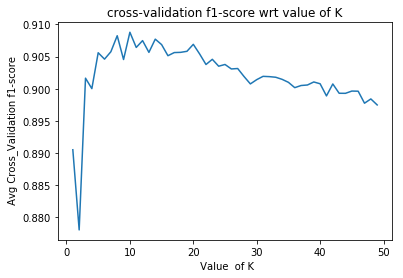

In [43]:
# Plotting the cross-validation accuracy wrt value of K:

myplot = plt.plot(knn_validation_scores['cv_range'] , knn_validation_scores['avg_f1_scores'])
plt.title('cross-validation f1-score wrt value of K')
plt.xlabel(' Value  of K')
plt.ylabel(' Avg Cross_Validation f1-score')



In [17]:
# We can see that k = 10, that is 10 nearest neigh bour gives the highest cross-val accuracy. Accuract descreses from there on 
# as the value of k Increases

In [18]:
# Now using this best value of K = 10 to retrain the model and score on the testing dataset:

from sklearn.neighbors import KNeighborsClassifier
knn_final = KNeighborsClassifier(n_jobs = -1 , n_neighbors = 10)

knn_final.fit(train_x, np.ravel(train_y))
y_pred = DataFrame(knn_final.predict(test_x), columns = ['Y_pred'])
Actual = DataFrame(test_y)


# Looking at the Actual and Predicted Classes together:
results = pd.concat([Actual,y_pred], axis =1)

# Dictionary map of Activity Labels: 

activity_labels = { 1: 'WALKING',  2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}

results['Y_pred'].map(activity_labels).head()


0    STANDING
1    STANDING
2    STANDING
3    STANDING
4    STANDING
Name: Y_pred, dtype: object

In [19]:
print(activity_labels)
results.head()

{1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}


,activity_label,Y_pred
0,5,5
1,5,5
2,5,5
3,5,5
4,5,5


In [20]:
# Getting Model Evaluation Metrics:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, f1_score

# Printing the Confusion Matrix, Accuracy,  Classification Report and F1_Score:

print("Confusion Matrix: \n",confusion_matrix(y_pred,Actual))
print("\n Accuracy: \n",accuracy_score(y_pred,Actual))
print("\n Classification_Report: \n",classification_report(y_pred,Actual))
print("\n Avg macro F1 Score : \n",f1_score(y_pred,Actual, average = 'macro'))


#Initializing an empty dictionary, this will be used to store results of all the models for comparison later:
model_reports = {}

model_reports['Knn Algo'] = classification_report(y_pred,Actual, output_dict = True)['macro avg'] 
model_reports['Knn Algo']['accuracy'] = classification_report(y_pred,Actual, output_dict = True)['accuracy']
    
model_reports

Confusion Matrix: 
 [[486  36  51   0   0   0]
 [  0 431  41   4   0   0]
 [ 10   4 328   0   0   0]
 [  0   0   0 409  47   2]
 [  0   0   0  78 485   2]
 [  0   0   0   0   0 533]]

 Accuracy: 
 0.9066847641669494

 Classification_Report: 
               precision    recall  f1-score   support

           1       0.98      0.85      0.91       573
           2       0.92      0.91      0.91       476
           3       0.78      0.96      0.86       342
           4       0.83      0.89      0.86       458
           5       0.91      0.86      0.88       565
           6       0.99      1.00      1.00       533

    accuracy                           0.91      2947
   macro avg       0.90      0.91      0.90      2947
weighted avg       0.91      0.91      0.91      2947


 Avg macro F1 Score : 
 0.9038079349608216


{'Knn Algo': {'precision': 0.9021774393992644,
  'recall': 0.9106857052848407,
  'f1-score': 0.9038079349608216,
  'support': 2947,
  'accuracy': 0.9066847641669494}}

In [21]:
# Part 3: Multi-Class Logistic Regression with Elastinet

# My student Id is: 

student_id = 216337197

if (student_id % 2) == 0 : 
    metric = 'accuracy'
elif student_id % 2 == 1: 
    metric = 'f1_score'


print("metric selected for part 3:",metric)

metric selected for part 3: f1_score


In [22]:
# Part3: Multi-Class Logistic Regression with Elastinet
# Initializing the Model

from sklearn.linear_model import SGDClassifier

score = ['accuracy' ,'f1_macro']

parameters = { 'l1_ratio' : [0, 0.15, 0.5, 0.7, 1], 'alpha': [1e-4,3e-4,1e-3,3e-3, 1e-2,3e-2] }

elastinet = SGDClassifier(n_jobs = -1, penalty = 'elasticnet', loss = 'log')

elastinet_model = GridSearchCV(elastinet, parameters, cv = 10, scoring = score , refit = 'f1_macro')
elastinet_model.fit(train_x, np.ravel(train_y))

#sorted(sklearn.metrics.SCORERS.keys())


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='log', max_iter=1000,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='elasticnet', power_t=0.5,
                                     random_state=None, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03],
                         'l1_ratio': [0, 0.15, 0.5, 0.7, 1]},
             pre_dispatch='2*n_jobs', refit='f1_macro'

In [23]:
# Note:
# For this multi-class model, we use macro-score since all the classes seem balanced and no class is under-represented
# Other option was use micro-level or weights f1-score but that would be more useful for situation where classes are in-balanced

In [44]:
# Getting the alpha and l1_ratio value with the best Accuracyf1 macro Score:

print(" Parameter value with the best accuracy score:")
elastinet_model.best_params_ , elastinet_model.best_score_, elastinet_model.best_index_

#elastinet_model.get_params

 Parameter value with the best accuracy score:


({'alpha': 0.0003, 'l1_ratio': 0.15}, 0.945675982151102, 6)

In [45]:
# Making a DataFrame of Mean Validation Scores w.r.t K

avg_f1_scores = Series(elastinet_model.cv_results_['mean_test_f1_macro'], name = 'avg_f1_scores')
alpha  = Series([x['alpha'] for x in elastinet_model.cv_results_['params']], name = 'alpha')
l1_ratio  = Series([x['l1_ratio'] for x in elastinet_model.cv_results_['params']], name = 'l1_ratio')
                             
elastinet_validation_scores = pd.concat([alpha, l1_ratio, avg_f1_scores], axis = 1)

elastinet_validation_scores.head()


,alpha,l1_ratio,avg_f1_scores
0,0.0001,0.00,0.940036
1,0.0001,0.15,0.942232
2,0.0001,0.50,0.940001
3,0.0001,0.70,0.939155
4,0.0001,1.00,0.935651


Text(0.5,0,' Value  of l1_ratio')

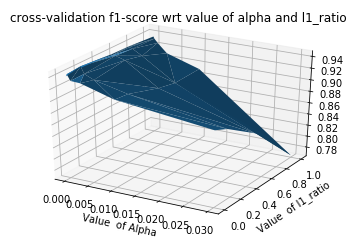

In [39]:
# Plotting the Surface Plot of  cross-validation accuracy wrt value of alpha and l1_ratio:

from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(elastinet_validation_scores['alpha'] , elastinet_validation_scores['l1_ratio'] , elastinet_validation_scores['avg_f1_scores'])
plt.title('cross-validation f1-score wrt value of alpha and l1_ratio')
plt.xlabel(' Value  of Alpha')
plt.ylabel(' Value  of l1_ratio')

In [27]:
# We can see that alpha =0.003 and l1_ratio = 0.15 ,  gives the highest cross-val f1_score. Accuract descreses from there on 
# as the value of alpha and l1_ratio Increases

In [46]:
# Now using this best value of alpha = 0.0003 and l1_ratio = 0.15,  to retrain the model and score on the testing dataset:

elastinet_final = SGDClassifier(alpha=0.0003 , loss='log', penalty='elasticnet', l1_ratio= 0.15)

elastinet_final.fit(train_x, np.ravel(train_y))
y_pred = DataFrame(elastinet_final.predict(test_x), columns = ['Y_pred'])
Actual = DataFrame(test_y)


# Looking at the Actual and Predicted Classes together:
results = pd.concat([Actual,y_pred], axis =1)
results.head()

,activity_label,Y_pred
0,5,5
1,5,5
2,5,5
3,5,5
4,5,5


In [29]:
# Getting Model Evaluation Metrics:
# Printing the Confusion Matrix, Accuracy,  Classification Report and F1_Score:

print("Confusion Matrix: \n",confusion_matrix(y_pred,Actual))
print("\n Accuracy: \n",accuracy_score(y_pred,Actual))
print("\n Classification_Report: \n",classification_report(y_pred,Actual))
print("\n Avg macro F1 Score : \n",f1_score(y_pred,Actual, average = 'macro'))

#Saving Results of the Elastinet Model into model_results dictionary:

model_reports['Elastinet Regression'] = classification_report(y_pred,Actual, output_dict = True)['macro avg'] 
model_reports['Elastinet Regression']['accuracy'] = classification_report(y_pred,Actual, output_dict = True)['accuracy']
    
model_reports

Confusion Matrix: 
 [[493  25   4   0   0   0]
 [  0 445   9   3   0   0]
 [  3   1 407   0   0   0]
 [  0   0   0 448  30   0]
 [  0   0   0  40 502   0]
 [  0   0   0   0   0 537]]

 Accuracy: 
 0.9609772650152698

 Classification_Report: 
               precision    recall  f1-score   support

           1       0.99      0.94      0.97       522
           2       0.94      0.97      0.96       457
           3       0.97      0.99      0.98       411
           4       0.91      0.94      0.92       478
           5       0.94      0.93      0.93       542
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947


 Avg macro F1 Score : 
 0.9611079921679782


{'Knn Algo': {'precision': 0.9021774393992644,
  'recall': 0.9106857052848407,
  'f1-score': 0.9038079349608216,
  'support': 2947,
  'accuracy': 0.9066847641669494},
 'Elastinet Regression': {'precision': 0.9606383635413364,
  'recall': 0.9619819390623854,
  'f1-score': 0.9611079921679782,
  'support': 2947,
  'accuracy': 0.9609772650152698}}

In [66]:
# Part 4: Support Vector Machine with RBF Kernel

# My student Id is: 

student_id = 216337197

if (student_id % 3) == 0 : 
    metric = 'f1_score'
elif student_id % 3 == 1: 
    metric = 'precision'
elif student_id % 3 == 2: 
    metric = 'accuracy_score'

print("metric selected for part 3:",metric)

metric selected for part 3: f1_score


In [67]:
# Part4 SVM rbf kernel
# Initializing the Model

from sklearn.svm import SVC

parameters = { 'C' : [1, 10, 100, 1000], 'gamma': [1e-1, 1e-4] }

svm = SVC(kernel = 'rbf', random_state = 1)

score = ['precision_macro' ,'f1_macro']

svm_model = GridSearchCV(svm, parameters, cv = 10, scoring = score, refit = 'f1_macro')
svm_model.fit(train_x, np.ravel(train_y))


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.1, 0.0001]},
             pre_dispatch='2*n_jobs', refit='f1_macro',
             return_train_score=False, scoring=['precision_macro', 'f1_macro'],
             verbose=0)

In [68]:
# Note:
# For this multi-class model, we use macro-score since all the classes seem balanced and no class is under-represented
# Other option was use micro-level or weights f1-score but that would be more useful for situation where classes are in-balanced

# Getting the gamma and C value with the best Accuracy Score:

print(" Parameter value with the best f1-macro score:")
svm_model.best_params_ , svm_model.best_score_, svm_model.best_index_
#svm_model.cv_results_

 Parameter value with the best f1-macro score:


({'C': 1000, 'gamma': 0.0001}, 0.9454009902774164, 7)

In [69]:
# Making a DataFrame of Mean Validation Precision Scores w.r.t gamma and C

avg_f1_scores = Series(svm_model.cv_results_['mean_test_f1_macro'], name = 'avg_f1_scores')
C  = Series([x['C'] for x in svm_model.cv_results_['params']], name = 'C')
gamma  = Series([x['gamma'] for x in svm_model.cv_results_['params']], name = 'gamma')
                             
svm_validation_scores = pd.concat([C, gamma, avg_f1_scores], axis = 1)

svm_validation_scores.head()

,C,gamma,avg_f1_scores
0,1,0.1000,0.919684
1,1,0.0001,0.791899
2,10,0.1000,0.922060
3,10,0.0001,0.906374
4,100,0.1000,0.922060


Text(0.5,0,' Value  of gamma')

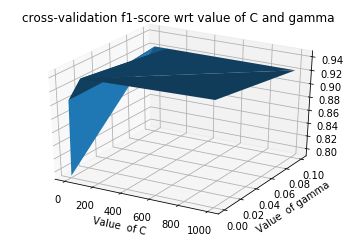

In [70]:
# Plotting the Surface Plot of  cross-validation accuracy wrt value of alpha and l1_ratio:

from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(svm_validation_scores['C'] , svm_validation_scores['gamma'] , svm_validation_scores['avg_f1_scores'])
plt.title('cross-validation f1-score wrt value of C and gamma')
plt.xlabel(' Value  of C')
plt.ylabel(' Value  of gamma')

In [35]:
# We can see that C = 1000 and gamma = 0.0001 ,  gives the highest cross-val f1_score. f1 score descreases from there on 
# as the value of C and gamma varies

In [71]:
# Now using this best value of C = 1000 and gamma = 0.0001,  to retrain the model and score on the testing dataset:

svm_final = SVC(kernel = 'rbf', random_state = 1, C = 1000, gamma = .0001)

svm_final.fit(train_x, np.ravel(train_y))
y_pred = DataFrame(svm_final.predict(test_x), columns = ['Y_pred'])
Actual = DataFrame(test_y)


# Looking at the Actual and Predicted Classes together:
results = pd.concat([Actual,y_pred], axis =1)
results.head()

,activity_label,Y_pred
0,5,5
1,5,5
2,5,5
3,5,5
4,5,5


In [72]:
# Getting Model Evaluation Metrics:
# Printing the Confusion Matrix, Accuracy,  Classification Report and F1_Score:

print("Confusion Matrix: \n",confusion_matrix(y_pred,Actual))
print("\n Accuracy: \n",accuracy_score(y_pred,Actual))
print("\n Classification_Report: \n",classification_report(y_pred,Actual))
print("\n Avg macro F1 Score : \n",f1_score(y_pred,Actual, average = 'macro'))

#Saving Results of the Elastinet Model into model_results dictionary:

model_reports['SVM Model'] = classification_report(y_pred,Actual, output_dict = True)['macro avg'] 
model_reports['SVM Model']['accuracy'] = classification_report(y_pred,Actual, output_dict = True)['accuracy']
    
model_reports

Confusion Matrix: 
 [[492  24   5   0   0   0]
 [  1 447   9   2   0   0]
 [  3   0 406   0   0   0]
 [  0   0   0 436  15   0]
 [  0   0   0  53 517   0]
 [  0   0   0   0   0 537]]

 Accuracy: 
 0.9619952494061758

 Classification_Report: 
               precision    recall  f1-score   support

           1       0.99      0.94      0.97       521
           2       0.95      0.97      0.96       459
           3       0.97      0.99      0.98       409
           4       0.89      0.97      0.93       451
           5       0.97      0.91      0.94       570
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947


 Avg macro F1 Score : 
 0.9620532237701402


{'Knn Algo': {'precision': 0.9021774393992644,
  'recall': 0.9106857052848407,
  'f1-score': 0.9038079349608216,
  'support': 2947,
  'accuracy': 0.9066847641669494},
 'Elastinet Regression': {'precision': 0.9606383635413364,
  'recall': 0.9619819390623854,
  'f1-score': 0.9611079921679782,
  'support': 2947,
  'accuracy': 0.9609772650152698},
 'SVM Model': {'precision': 0.9612391590873447,
  'recall': 0.9641028630136098,
  'f1-score': 0.9620532237701402,
  'support': 2947,
  'accuracy': 0.9619952494061758},
 'RF Model': {'precision': 0.9273506992428628,
  'recall': 0.931119686237667,
  'f1-score': 0.9284545750204668,
  'support': 2947,
  'accuracy': 0.9304377332880895}}

In [73]:
# Part 4: RandomForest Model

# My student Id is: 

student_id = 216337197

if (student_id % 4) == 0 : 
    metric = 'f1_score'
elif student_id % 4 == 1: 
    metric = 'precision'
elif student_id % 4 == 2: 
    metric = 'accuracy_score'
elif student_id % 4 == 3: 
    metric = 'recall_score'

print("metric selected for part 3:",metric)

metric selected for part 3: precision


In [55]:
# Part5  RandomForest
# Initializing the Model

from sklearn.ensemble import RandomForestClassifier

parameters = { 'n_estimators' : [200, 500, 700], 'max_depth': [300,500,600] }

rf = RandomForestClassifier(random_state = 1, n_jobs = -1)

score = ['precision_macro' ,'f1_macro']

rf_model = GridSearchCV(rf, parameters, cv = 10, scoring = score, refit = 'precision_macro')
rf_model.fit(train_x, np.ravel(train_y))


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=1,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'ma

In [56]:
# Note:
# For this multi-class model, we use macro-score since all the classes seem balanced and no class is under-represented
# Other option was use micro-level or weights precision score but that would be more useful for situation where classes are in-balanced

# Getting the maX depth and n_estimators value with the best precision Score:

print(" Parameter value with the best precision-macro score:")
rf_model.best_params_ , rf_model.best_score_, rf_model.best_index_


 Parameter value with the best precision-macro score:


({'max_depth': 300, 'n_estimators': 500}, 0.9397127729393072, 1)

Text(0.5,0,' Value  of  n_estimators')

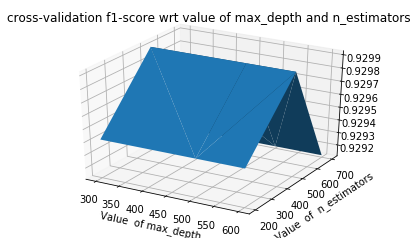

In [61]:
# Making a DataFrame of Mean Validation Precision Scores w.r.t gamma and C

avg_f1_scores = Series(rf_model.cv_results_['mean_test_f1_macro'], name = 'avg_f1_scores')
max_depth  = Series([x['max_depth'] for x in rf_model.cv_results_['params']], name = 'max_depth')
n_estimators  = Series([x['n_estimators'] for x in rf_model.cv_results_['params']], name = 'n_estimators')
                             
rf_validation_scores = pd.concat([max_depth, n_estimators, avg_f1_scores], axis = 1)
rf_validation_scores.head()

# Plotting the Surface Plot of  cross-validation accuracy wrt value of alpha and l1_ratio:

from mpl_toolkits.mplot3d import Axes3D  
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_trisurf(rf_validation_scores['max_depth'] , rf_validation_scores['n_estimators'] , rf_validation_scores['avg_f1_scores'])
plt.title('cross-validation f1-score wrt value of max_depth and n_estimators')
plt.xlabel(' Value  of max_depth')
plt.ylabel(' Value  of  n_estimators')



In [62]:
# We can see that max_depth = 300 and n_estimators= 500 ,  gives the highest cross-val precision_score. 
# Precision descreases from there on as the value of max_depth and n_estimator varies

In [64]:
# Now using this best value of max_depth = 300 and n_estimators= 500  to retrain the model and score on the testing dataset:

rf_final = RandomForestClassifier(n_jobs = -1, random_state = 1, max_depth = 300, n_estimators = 500)

rf_final.fit(train_x, np.ravel(train_y))
y_pred = DataFrame(rf_final.predict(test_x), columns = ['Y_pred'])
Actual = DataFrame(test_y)


# Looking at the Actual and Predicted Classes together:
results = pd.concat([Actual,y_pred], axis =1)
results.head()

,activity_label,Y_pred
0,5,5
1,5,5
2,5,5
3,5,5
4,5,5


In [65]:
# Getting Model Evaluation Metrics:
# Printing the Confusion Matrix, Accuracy,  Classification Report and F1_Score:

print("Confusion Matrix: \n",confusion_matrix(y_pred,Actual))
print("\n Accuracy: \n",accuracy_score(y_pred,Actual))
print("\n Classification_Report: \n",classification_report(y_pred,Actual))
print("\n Avg macro F1 Score : \n",f1_score(y_pred,Actual, average = 'macro'))

#Saving Results of the Elastinet Model into model_results dictionary:

model_reports['RF Model'] = classification_report(y_pred,Actual, output_dict = True)['macro avg'] 
model_reports['RF Model']['accuracy'] = classification_report(y_pred,Actual, output_dict = True)['accuracy']
    
# Lokking at test data metrics for all 4 models for model selection:    
model_reports

Confusion Matrix: 
 [[482  31  19   0   0   0]
 [  5 433  43   0   0   0]
 [  9   7 358   0   0   0]
 [  0   0   0 438  38   0]
 [  0   0   0  53 494   0]
 [  0   0   0   0   0 537]]

 Accuracy: 
 0.9304377332880895

 Classification_Report: 
               precision    recall  f1-score   support

           1       0.97      0.91      0.94       532
           2       0.92      0.90      0.91       481
           3       0.85      0.96      0.90       374
           4       0.89      0.92      0.91       476
           5       0.93      0.90      0.92       547
           6       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.93      0.93      2947
weighted avg       0.93      0.93      0.93      2947


 Avg macro F1 Score : 
 0.9284545750204668


{'Knn Algo': {'precision': 0.9021774393992644,
  'recall': 0.9106857052848407,
  'f1-score': 0.9038079349608216,
  'support': 2947,
  'accuracy': 0.9066847641669494},
 'Elastinet Regression': {'precision': 0.9606383635413364,
  'recall': 0.9619819390623854,
  'f1-score': 0.9611079921679782,
  'support': 2947,
  'accuracy': 0.9609772650152698},
 'SVM Model': {'precision': 0.9534819634403724,
  'recall': 0.9534046800013048,
  'f1-score': 0.9531918824396192,
  'support': 2947,
  'accuracy': 0.9548693586698337},
 'RF Model': {'precision': 0.9273506992428628,
  'recall': 0.931119686237667,
  'f1-score': 0.9284545750204668,
  'support': 2947,
  'accuracy': 0.9304377332880895}}

In [ ]:
# Part 6:

#From the above model metrics for all 4 models, we can observe that elastinet logistic regression achieves 
# the best overall f1-score and accuracy. f1-score is an overall better metric to evlauate these models on 
# since accuracy can be misleading at times due to class under/over representation.
# the reason behind this could be that it uses regularization to control over-fitting on the train dataset, 
# while other models here are susceptible to overfit - this could be controlled though to an extent with tuning parameters
# And as we have seen some features so have high-corelation (multi-colinearity) which might be affecting other models

# Knn Classifier was the worst performer among all models, which f1-score and accuracy much lower than other models
# the reason behind it that Knn-model tends to not work too well with high dimensional data and multi-class data like here

# To improve model performance:
#1) we can tune more hyper-parameters like: max_faetures, oob_score, min_impurity_decrease etc in random forest model
#2) Some features in the training data have v high-correlation among themselves, as has been show earlier using train_x.corr() 
#   Output. Hence if we elimitate multi-colinearity that can help making model more robust and accurate.
